
Table of Contents
------------------
- Import Libraries
- Read Data
- Get some information about the data
- Data Cleaning
- Data Visualization & Getting Analysis
- Insights

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

Read Data

In [22]:
df=pd.read_csv('Superstore Sales Dataset.csv')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [23]:
df.shape

(9800, 18)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Data Cleaning

In [25]:
# Remove unnecassary Columns

df.drop(['Row ID','Order ID','Customer ID','Customer Name'],axis=1,inplace=True)

In [26]:
# Display the duplicated rows

df[df.duplicated()]

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3406,23/04/2015,27/04/2015,Standard Class,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [27]:
# Remove Duplicates

df.drop_duplicates(inplace=True)

In [28]:
# get the number of nulls in each column

df.isna().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

--> There are 11 Nulls in Postal Code Column

In [29]:
# display the rows which have nulls

df[df.isnull().any(axis=1)]

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


--> All nulls are from Vermont so get the postal code from google 

In [30]:
# Get the postal code of Vermont state from google -----> 05401 , and fill the nulls by it

df['Postal Code'].fillna(5401,inplace=True)

In [31]:
# Now No Nulls

df.isna().sum().sum()

0

In [32]:
# Change the type of Order Date and Ship Date columns from object to date
# Change the type of Postal Code column from float to integer

df['Order Date']=pd.to_datetime(df['Order Date'],format="%d/%m/%Y")
df['Ship Date']=pd.to_datetime(df['Ship Date'],format="%d/%m/%Y")
df['Postal Code']=df['Postal Code'].astype('int')

The dataset contains an "order date" column, allowing us to derive additional columns such as "order month," "order year," and "order day"

In [40]:
df[['Order Date', 'Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [41]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day'] = df['Order Date'].dt.day_name()

Calculate the delay period in days between the order date and the shipping date

In [42]:
df['Shipping Duration'] = df['Ship Date'] - df['Order Date']
df['Shipping Duration'] = df['Shipping Duration'].dt.days
df['Shipping Duration']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Duration, Length: 9799, dtype: int64

In [43]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,Order Month,Order Year,Order Day
0,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3,11,2017,Wednesday
1,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,11,2017,Wednesday
2,2017-06-12,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4,6,2017,Monday


Data Visualization & Getting Analysis

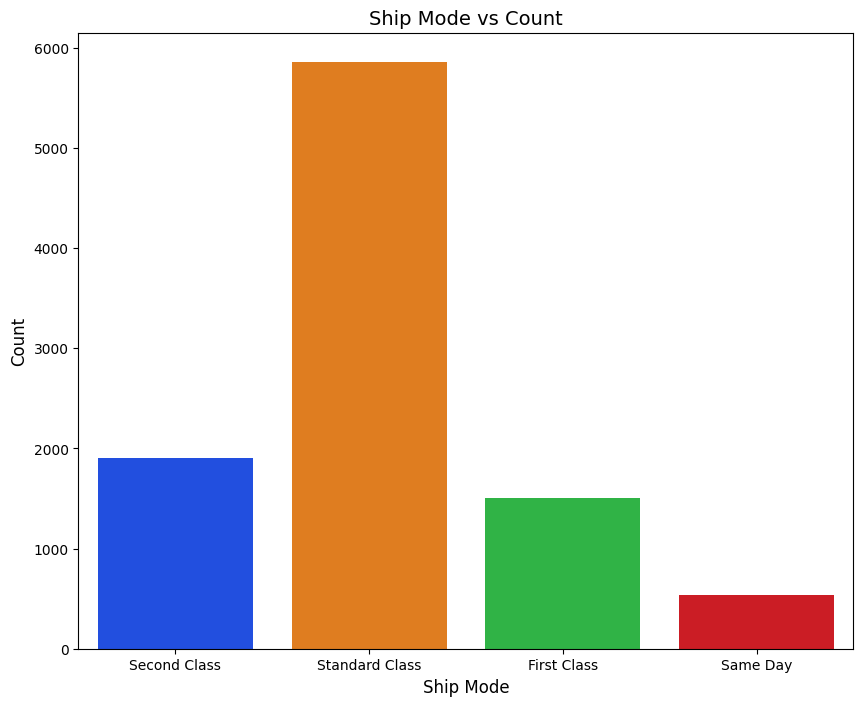

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df'
plt.figure(figsize=(10, 8))

# Choose a color palette. Here, we use 'bright' palette from seaborn
sns.countplot(x=df['Ship Mode'], palette='bright')

plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Ship Mode vs Count', fontsize=14)
plt.show()

- Result : Ship Mode of most of the Orders is Standard Class

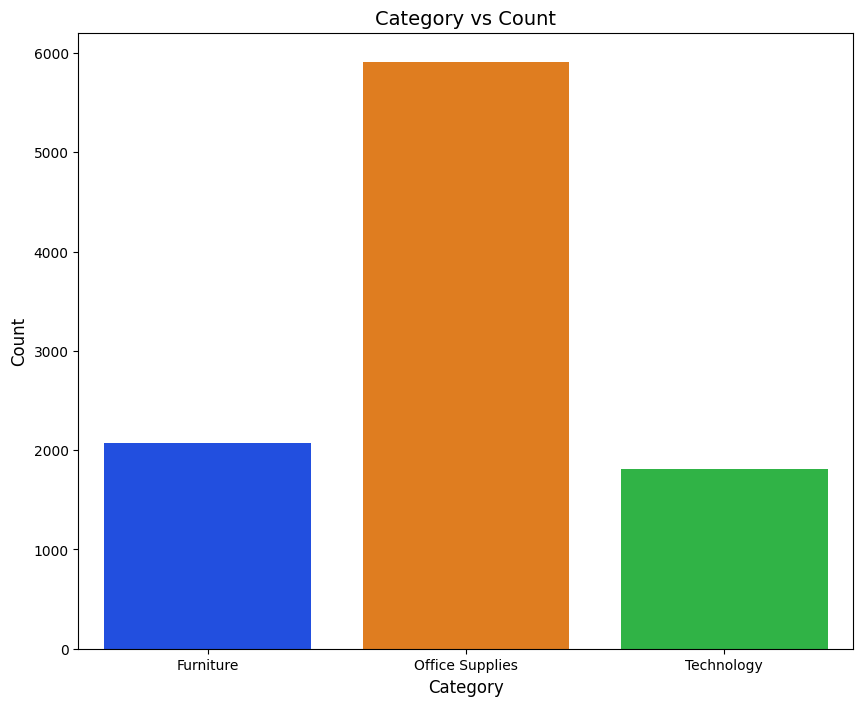

In [45]:
# Category vs Count

plt.figure(figsize=(10, 8))
sns.countplot(x=df['Category'], palette='bright')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Category vs Count', fontsize=14)
plt.show()

- Result : Most of the Orders in Category are Office Supplies

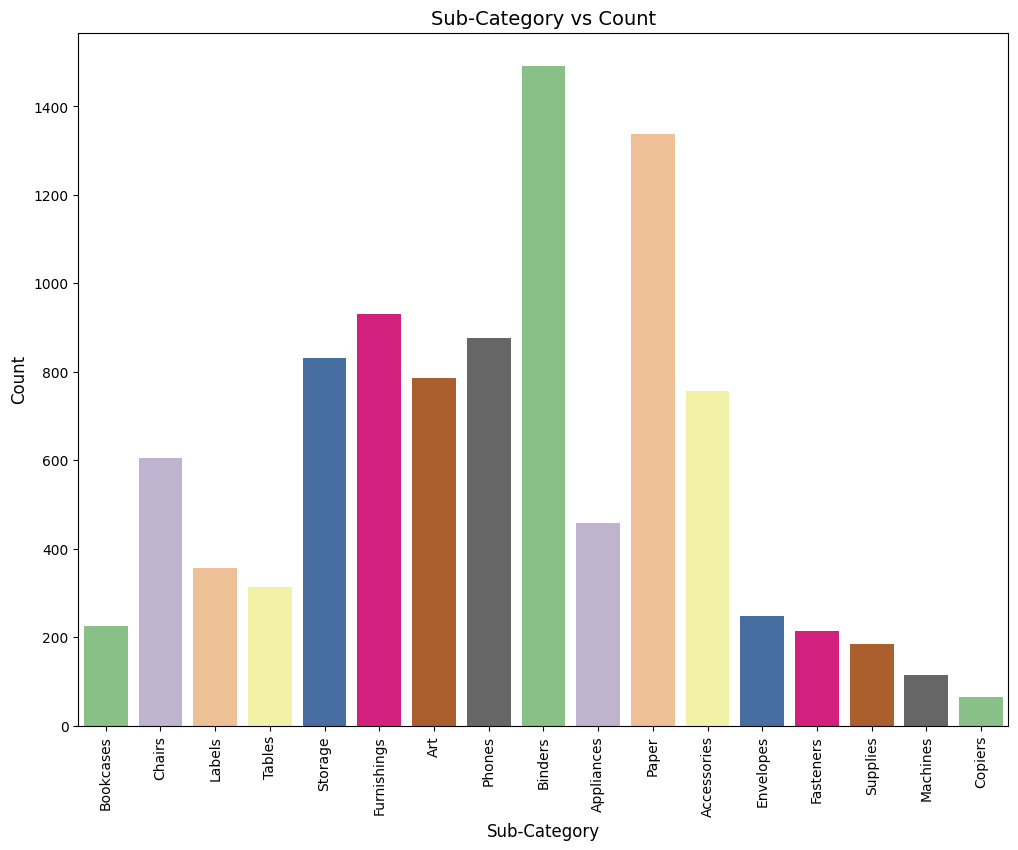

In [46]:
# Sub-Category vs Count

plt.figure(figsize=(12,9))
sns.countplot(x=df['Sub-Category'], palette='Accent')
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Sub-Category vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

- Result : Most of the Orders in Sub_Category are Binders and Papers

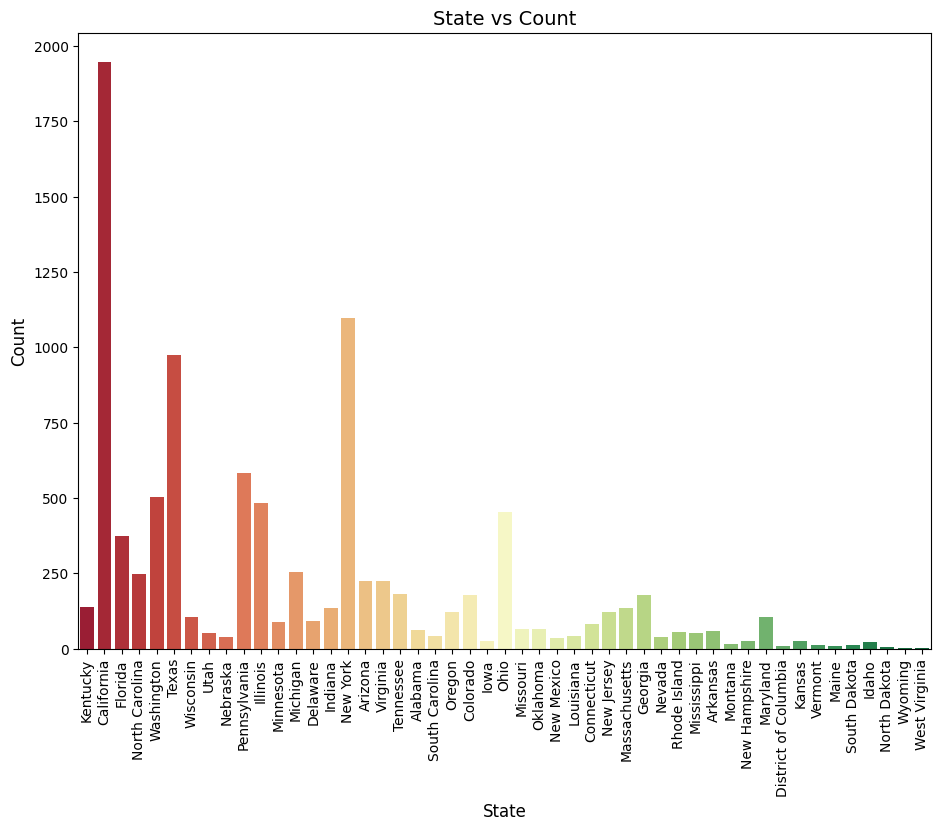

In [47]:
# State vs Count

plt.figure(figsize=(11,8))
sns.countplot(x=df['State'],palette='RdYlGn')
plt.xlabel('State',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('State vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

- Result : Most of the Orders are from California and New York States

In [48]:
# Sales of the Top 15 States 

top_states=df.groupby(['State']).sum('Sales').sort_values('Sales',ascending=False).head(15)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)
top_states

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,74848.98
9,Virginia,70636.72


In [49]:
# Top 15 States vs Sales

fig=px.bar(top_states,x='State',y='Sales',title='Top 15 States vs Sales',height=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

- Result : Most of the Sales are from California and New York States

In [57]:
# Sales of the Top 15 Cities 

top_cities=df.groupby(['City']).sum('Sales').sort_values('Sales',ascending=False).head(15)
top_cities=top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities   

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


In [58]:
# Top 15 Cities vs Sales

fig=px.bar(top_cities,x='City',y='Sales',title='Top 15 Cities vs Sales',height=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

- Result : Most of the Sales are from New York City and Los Angeles

In [51]:
# Sales per Year

sales_by_Year = df.groupby('Order Year')['Sales'].sum().reset_index()

fig = px.line(sales_by_Year,
              x='Order Year',
              y='Sales',
              title='Sales by Year')
fig.show()

In [53]:
# Sales per month

sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()

fig = px.line(sales_by_month,
              x='Order Month',
              y='Sales',
              title='Sales by Month')
fig.show()

In [54]:
# Sales by Day

sales_by_Day = df.groupby('Order Day')['Sales'].sum().reset_index()

fig = px.line(sales_by_Day,
              x='Order Day',
              y='Sales',
              title='Sales by Day')
fig.show()

In [60]:
# Sales of the Categories

Categories=df.groupby('Category').sum('Sales').sort_values('Sales',ascending=False)
Categories=Categories[['Sales']].round(2)
Categories.reset_index(inplace=True)
Categories

,Category,Sales
0,Technology,827455.87
1,Furniture,728377.20
2,Office Supplies,705422.33


In [56]:
# the sales by category

sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()


fig = px.pie(sales_by_category,
            values='Sales',
            names='Category',
            hole=0.5,
            color_discrete_sequence=px.colors.qualitative.Dark2)

fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Sales by Category', title_font=dict(size=17))

fig.show()

- Result : Most of the Sales are from Technology Products

Insights

- Ship Mode of most of the Orders is Standard Class
- Most of the Orders are from Consumers
- Most of the Orders in Category are Office Supplies
- Most of the Orders in Sub-Category are Binders and Papers
- Most of the Orders are from California and New York States
- Most of the Sales are from California and New York States
- Most of the Sales are from New York City and Los Angeles
- Most of the Sales are from Technology Products
- Most of the Sales are from Consumers
- Most of the Sales are from West Region
- The Canon imageCLASS 2200 Advanced Copier Product acheived the most Sales